# JEE Advance 2023 Analysis

Using the information provided by Jossa, the data of seat allotment through Jossa is provided in a google sheet.
We will use this data to visualise the data and make predictions.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid',palette='deep')

First, we will take the Google sheet URL and convert it to a pandas dataframe.
This is done through first converting the link such that the google sheet is converted to a csv file.

In [3]:
import re

def convert_google_sheet_url(url):
    # Regular expression to match and capture the necessary part of the URL
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    # Replace function to construct the new URL for CSV export
    # If gid is present in the URL, it includes it in the export URL, otherwise, it's omitted
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    # Replace using regex
    new_url = re.sub(pattern, replacement, url)

    return new_url

In [4]:
url = 'https://docs.google.com/spreadsheets/d/1sxzaxgF7kNojdijfmMaG_nUb_rjKUKsC1FavQnTsggY/edit#gid=1712771621'
new_url = convert_google_sheet_url(url)
print(new_url)

https://docs.google.com/spreadsheets/d/1sxzaxgF7kNojdijfmMaG_nUb_rjKUKsC1FavQnTsggY/export?gid=1712771621&format=csv


In [5]:
dfjee = pd.read_csv(new_url)
dfjee.head()

,CRL,Roll Number,City,State,Institute Name,Program,Seat Allotment Category,Seat Allotment Pool,GEN-EWS,OBC-NCL,...,SC-PWD,ST-PWD,PREP-SC,PREP-ST,PREP-CRL-PWD,PREP-GEN-EWS-PWD,PREP-OBC-NCL-PWD,PREP-SC-PWD,PREP-ST-PWD,AAT Status
0,1.0,236165088,Hyderabad,Telangana,IIT Bombay,"Computer Science and Engineering (4 Years, Bac...",OPEN,Gender-Neutral,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Qualified
1,2.0,236131371,Hyderabad,Telangana,IIT Bombay,"Computer Science and Engineering (4 Years, Bac...",OPEN,Gender-Neutral,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Qualified
2,3.0,237047209,Ghaziabad,Uttar Pradesh,IIT Bombay,"Computer Science and Engineering (4 Years, Bac...",OPEN,Gender-Neutral,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Qualified
3,4.0,237020329,Mohali,Punjab,IIT Bombay,"Computer Science and Engineering (4 Years, Bac...",OPEN,Gender-Neutral,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Qualified
4,5.0,236055009,Vijayawada,Andhra Pradesh,IIT Bombay,"Computer Science and Engineering (4 Years, Bac...",OPEN,Gender-Neutral,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Qualified


In [6]:
dfjee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43769 entries, 0 to 43768
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CRL                      26321 non-null  float64
 1   Roll Number              43769 non-null  int64  
 2   City                     43769 non-null  object 
 3   State                    43769 non-null  object 
 4   Institute Name           17340 non-null  object 
 5   Program                  17340 non-null  object 
 6   Seat Allotment Category  17340 non-null  object 
 7   Seat Allotment Pool      17340 non-null  object 
 8   GEN-EWS                  5371 non-null   float64
 9   OBC-NCL                  9049 non-null   float64
 10  SC                       5004 non-null   float64
 11  ST                       1645 non-null   float64
 12  CRL-PWD                  198 non-null    float64
 13  GEN-EWS-PWD              26 non-null     float64
 14  OBC-NCL-PWD           

### Top 100 ranks and states
Let us plot a graph and visualise the regions where the top 100 ranks belonged too.

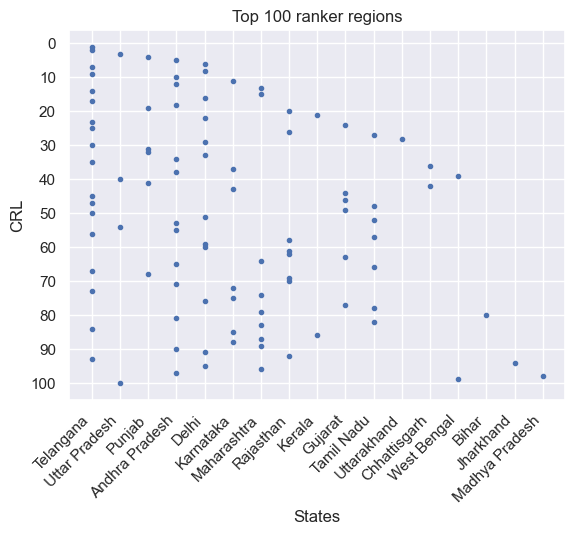

In [7]:
x = np.array(dfjee['State'])
y = np.array(dfjee['CRL'])

# slicing to get top 100 CRL
x = x[:100]
y = y[:100]

plt.plot(x,y, marker = '.', linestyle = 'none')
plt.xlabel('States')
plt.ylabel('CRL')
plt.title('Top 100 ranker regions')
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()

## State toppers

Let us see what is the CRL topper of each state/Union Territory.

In [8]:
x = np.array(dfjee['State'])
states = set(x)
print(f" Number of unique States/UT's = {len(states)}")

 Number of unique States/UT's = 33


In [9]:
x = np.array(dfjee['State'])
z = np.array([dfjee['CRL']])
list = [[0,'a']]
for i in states:
    for j in range(len(x)):
        if i == x[j]:
            list.append([j+1, i])
            break

list2 = np.array(list[1:])
sorted_data = sorted(list2, key=lambda x: int(x[0]))
max_width = max(len(state) for state, _ in sorted_data)

print('\033[1m' + "Best Rank   State  " + '\033[0m')

# Print the output in justified format
for state, number in sorted_data:
    print(f"{state.ljust(max_width)}       {str(number).rjust(4)}")

Best Rank   State  
1           Telangana
3           Uttar Pradesh
4           Punjab
5           Andhra Pradesh
6           Delhi
11          Karnataka
13          Maharashtra
20          Rajasthan
21          Kerala
24          Gujarat
27          Tamil Nadu
28          Uttarakhand
36          Chhattisgarh
39          West Bengal
80          Bihar
94          Jharkhand
98          Madhya Pradesh
317         Haryana
326         Odisha
355         Assam
385         Chandigarh
1171        Puducherry
1210        Tripura
1223        Jammu and Kashmir
1576         Goa
1763        Himachal Pradesh
4352        Arunachal Pradesh
6153        Meghalaya
13145       Sikkim
30148       Ladakh
33177       Mizoram
33191       Nagaland
35334       Andaman and Nicobar Islands


## Number of students in top (x) state wise

Let us see how many students are in the top (x) from each state.
You can change the range from the below variable.

In [10]:
checkrange = 10000

In [11]:
list = [[0,'a']]
for i in states:
    count=0
    for j in range (checkrange):
        if i==x[j]:
            count = count +1
    list.append([count, i])
    
list2 = np.array(list[1:])
sorted_data = sorted(list2, key=lambda x: int(x[0]))
max_width = max(len(state) for state, _ in sorted_data)
sorted_data.reverse()
print('\033[1m' + f"Top {checkrange}   State  " + '\033[0m')
# Print the output in justified format
for state, number in sorted_data:
    print(f"{state.ljust(max_width)}        {str(number).rjust(4)}")
    

Top 10000   State  
1173        Maharashtra
1165        Delhi
1113        Andhra Pradesh
1103        Rajasthan
1000        Telangana
698         Uttar Pradesh
543         Karnataka
501         Gujarat
426         Madhya Pradesh
386         Punjab
366         West Bengal
345         Tamil Nadu
263         Bihar
171         Kerala
168         Haryana
157         Jharkhand
115         Odisha
92          Uttarakhand
88          Chhattisgarh
37          Assam
24          Jammu and Kashmir
17           Goa
17          Chandigarh
11          Tripura
11          Himachal Pradesh
6           Puducherry
3           Meghalaya
1           Arunachal Pradesh
0           Andaman and Nicobar Islands
0           Sikkim
0           Mizoram
0           Nagaland
0           Ladakh


## Applying basic linear regression

Lets see how from the north to south, does your result change.

In [31]:
ordered_states_and_UTs = np.array([
    'Ladakh', 'Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 
    'Uttarakhand', 'Haryana', 'Delhi', 'Chandigarh', 'Uttar Pradesh', 
    'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 
    'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal', 
    'Jharkhand', 'Odisha', 'Chhattisgarh', 'Madhya Pradesh', 
    'Rajasthan', 'Gujarat', 'Maharashtra', 'Telangana', 'Goa', 
    'Karnataka', 'Andhra Pradesh', 'Tamil Nadu', 'Kerala', 
    'Puducherry', 'Andaman and Nicobar Islands'
])
print(len(ordered_states_and_UTs))

33


In [32]:
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf

# custom functions
import python_utils as utils

In [33]:
counter=1
list.clear()
for i in ordered_states_and_UTs:
    list.append([counter, i])
    counter = counter +1
list

[[1, 'Ladakh'],
 [2, 'Jammu and Kashmir'],
 [3, 'Himachal Pradesh'],
 [4, 'Punjab'],
 [5, 'Uttarakhand'],
 [6, 'Haryana'],
 [7, 'Delhi'],
 [8, 'Chandigarh'],
 [9, 'Uttar Pradesh'],
 [10, 'Bihar'],
 [11, 'Sikkim'],
 [12, 'Arunachal Pradesh'],
 [13, 'Nagaland'],
 [14, 'Mizoram'],
 [15, 'Tripura'],
 [16, 'Meghalaya'],
 [17, 'Assam'],
 [18, 'West Bengal'],
 [19, 'Jharkhand'],
 [20, 'Odisha'],
 [21, 'Chhattisgarh'],
 [22, 'Madhya Pradesh'],
 [23, 'Rajasthan'],
 [24, 'Gujarat'],
 [25, 'Maharashtra'],
 [26, 'Telangana'],
 [27, 'Goa'],
 [28, 'Karnataka'],
 [29, 'Andhra Pradesh'],
 [30, 'Tamil Nadu'],
 [31, 'Kerala'],
 [32, 'Puducherry'],
 [33, 'Andaman and Nicobar Islands']]

Tell the rank range:

In [36]:
counter = 10000

In [40]:
y= np.array(dfjee['CRL'])
y = y[:counter]
x = x[:counter]

it = 0
for i in x:
    for j in range (len(list)):
        if i == list[j][1]:
            x[it] = list[j][0]
            break
    it = it +1   
    
x = x.astype(int)
y2 = y.astype(int)
x = x.reshape(-1, 1)

In [42]:
 from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.07, l1_ratio=0.1)
elastic_net.fit(x, y2)
y_pred = elastic_net.predict(x)

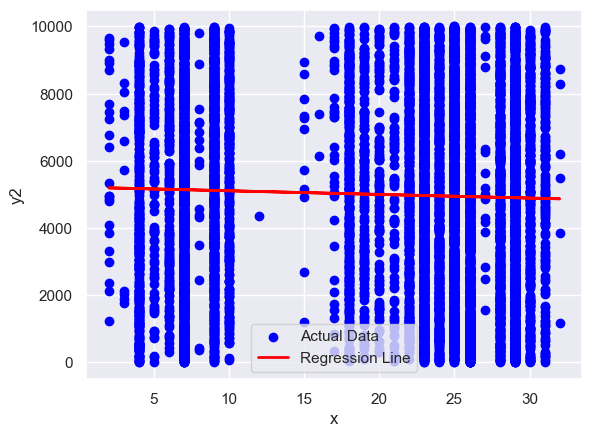

In [44]:
plt.scatter(x, y2, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('x')
plt.ylabel('y2')
plt.legend()
plt.show()

In [46]:
print(f"Slope (Coefficient): {elastic_net.coef_[0]}")
print(f"Intercept: {elastic_net.intercept_}")

Slope (Coefficient): -10.84887255085562
Intercept: 5218.279137360386
